In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.spatial.distance import cdist

In [2]:
class RadialBasisFunctionNetwork:
    def __init__(self, num_centers, learning_rate=0.1):
        self.num_centers = num_centers
        self.learning_rate = learning_rate
        self.centers = None
        self.weights = None

    def _initialize_centers(self, X):
        indices = np.random.choice(len(X), size=self.num_centers, replace=False)
        return X[indices]

    def _rbf_kernel(self, X, centers, sigma=1.0):
        distances = cdist(X, centers)
        return np.exp(-distances / (2 * sigma ** 2))

    def fit(self, X, y, epochs=100):
        self.centers = self._initialize_centers(X)
        phi = self._rbf_kernel(X, self.centers)

        phi = np.c_[np.ones(len(X)), phi]

        self.weights = np.linalg.pinv(phi) @ y

        for epoch in range(epochs):
            predictions = self.predict(X)
            error = y - predictions
            self.weights += self.learning_rate * phi.T @ error

    def predict(self, X):
        phi = self._rbf_kernel(X, self.centers)
        # Add bias term
        phi = np.c_[np.ones(len(X)), phi]
        return phi @ self.weights

In [4]:
# Create a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RBF network
num_centers = 10
learning_rate = 0.1

rbf_network = RadialBasisFunctionNetwork(num_centers=num_centers, learning_rate=learning_rate)
rbf_network.fit(X_train, y_train, epochs=100)

# Make predictions on the test set with a threshold of 0.5
predictions = (rbf_network.predict(X_test) > 0.5).astype(int)

# Evaluate the performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

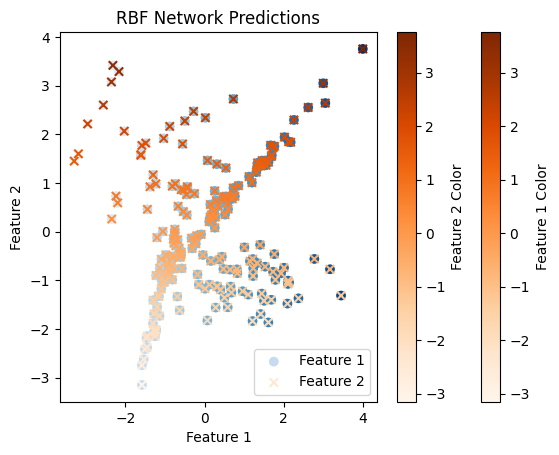

Accuracy: 0.505
Confusion Matrix:
[[101   0]
 [ 99   0]]


In [6]:
feature1 = X_test[:, 0]
feature2 = X_test[:, 1]


predictions = [0, 1, 0, 1, 0, 1] 


cmap_feature1 = plt.cm.Blues
cmap_feature2 = plt.cm.Oranges


plt.scatter(feature1, feature2, c=feature1, cmap=cmap_feature1, marker='o', label='Feature 1')
plt.scatter(feature1, feature2, c=feature2, cmap=cmap_feature2, marker='x', label='Feature 2')


plt.colorbar(label='Feature 1 Color')
plt.colorbar(label='Feature 2 Color')


plt.title('RBF Network Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.legend()


plt.show()

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

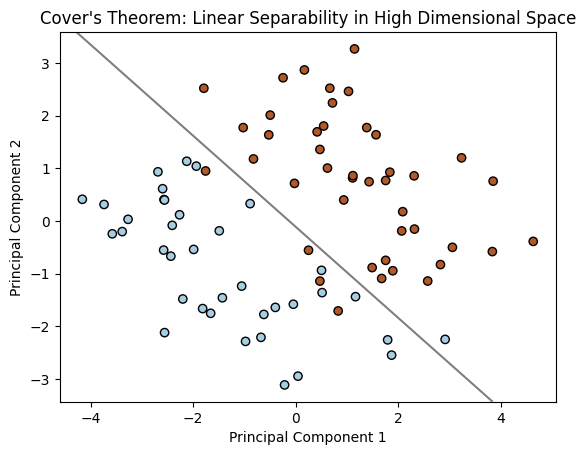

Accuracy on the test set: 0.9


In [8]:
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_pca, y_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.title('Cover\'s Theorem: Linear Separability in High Dimensional Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.show()

X_test_pca = pca.transform(X_test)
predictions = svm_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on the test set: {accuracy}")